In [1]:
%matplotlib inline
import pynucastro as pyna
import numpy as np

http://articles.adsabs.harvard.edu/pdf/1992ApJ...396..649T
Table 1 Net 5 N = 130

But with electron captures

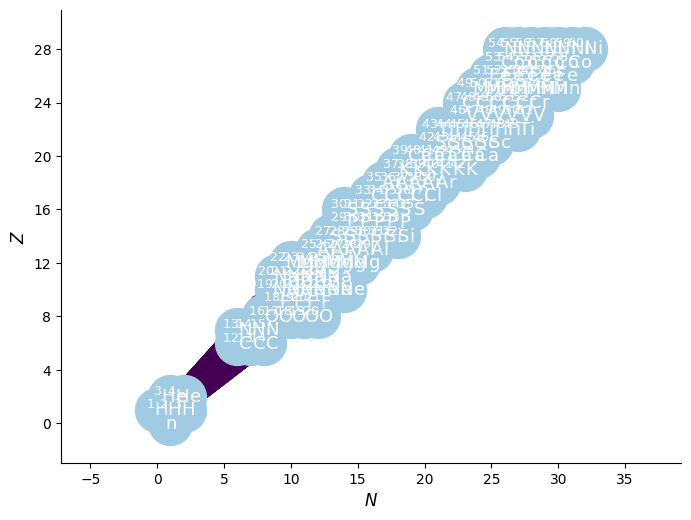

In [2]:
Nuclei = { 
    "H" :  [1,3],
    "He" : [3,4],
    "C" :  [12,14],
    "N" :  [13,15],
    "O" :  [16, 19],
    "F" :  [18, 21], 
    "Ne" : [19,24],
    "Na" : [20, 24],
    "Mg" : [22,27],
    "Al" : [25, 29],
    "Si" : [27, 32],
    "P"  : [29, 33],
    "S"  : [30, 35],
    "Cl" : [33, 37], 
    "Ar" : [35, 39],
    "K"  : [37, 42],
    "Ca" : [39, 44],
    "Sc" : [42, 46], 
    "Ti" : [43, 49],
    "V"  : [46, 51], 
    "Cr" : [47, 52],
    "Mn" : [49, 55],
    "Fe" : [51, 56],
    "Co" : [53, 58],
    "Ni" : [54, 60]    
}
All_Nuclei = []
for Nuc, Num in Nuclei.items():
    for i in range(Num[0], Num[1]+1):
        All_Nuclei.append(Nuc + str(i))
assert len(All_Nuclei) == 130
All_Nuclei.append("n") #neutron


library_file = '../results07070315'
mylibrary = pyna.rates.Library(library_file)
escn_tabular = ["f20--o20-toki","ne20--f20-toki","o20--f20-toki","f20--ne20-toki"]
Net5_TW1992_lib = mylibrary.linking_nuclei(All_Nuclei, with_reverse=True)

from pynucastro import Nucleus
new_rates = []
#screens out duplicate rates that we include in the escn_tabular.
for rate in Net5_TW1992_lib.get_rates():
    if rate.reactants == [Nucleus("f20")] and rate.products == [Nucleus("o20")]:
        continue
    elif rate.reactants == [Nucleus("ne20")] and rate.products == [Nucleus("f20")]:
        continue
    elif rate.reactants == [Nucleus("o20")] and rate.products == [Nucleus("f20")]:
        continue
    elif rate.reactants == [Nucleus("f20")] and rate.products == [Nucleus("ne20")]:
        continue
    else:
        new_rates.append(rate)
        
Net5_TW1992 = pyna.networks.StarKillerNetwork(rates = new_rates, rate_files=escn_tabular)
Net5_TW1992.plot()

Net5_TW1992.write_network()